In [ ]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

This part of the assignment deals with discrete Fourier transform as well as python programming.

## Instructions:

Please rename this file with Your Roll No.

1.   Only edit at "### WRITE YOUR CODE HERE"
2.   Please rename this file with Your Roll No.
3.   Render (Kernel > Restart & Run All) before submitting, so that we can see your graphs here




In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
import math

Upload 'pic1.png' and 'pic2.jpg' files manually to your google colab working directory:

1. Click on the folder drawing button on the left below the <> sign.
2. Click on Upload to session storage button to upload the images.

In [ ]:
img = imread('pic1.jpg')

Run below code block to display the uploaded image.

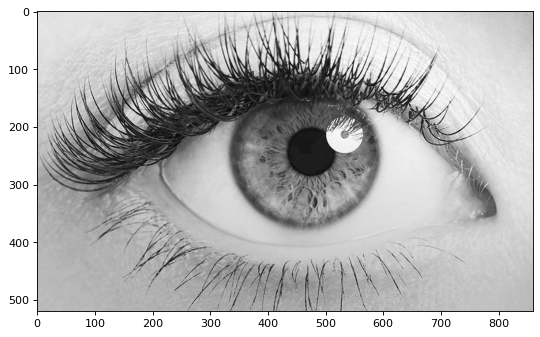

In [ ]:
img_gray = rgb2gray(img)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(img_gray, cmap='gray');

Calculate the 2-D Fourier Transform of the input image



In [ ]:
def dft_xs(img_gray):
    '''
    Inputs:
        img_gray - Original image size N x N
    Outputs:
        Xs: magnitude spectrum of size N x N
        fs: phase spectrum of size N x N
    '''
    ft = np.fft.fft2(img_gray)
    ftshift = np.fft.fftshift(ft)
    fs = np.angle(ftshift)
    Xs = 20*np.log(np.abs(ftshift))

    return Xs, fs

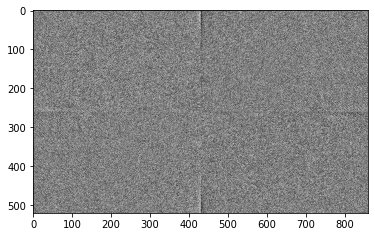

In [ ]:
Xs, fs = dft_xs(img_gray)
plt.imshow(Xs, cmap='gray');
plt.imshow(fs, cmap='gray');

Calculate the 2-D Inverse Fourier Transform of the input image

In [ ]:
def idft_xs(Xs,fs):
    '''
    Inputs:
        Xs: magnitude spectrum of size N x N
        fs: phase spectrum of size N x N
        
    Outputs:
        img_gray_recon - Original image size N x N
    '''
    mag_recon = np.exp(Xs/20)
    ph_recon = np.exp(1j*fs)

    shifted_ft = np.multiply(mag_recon, ph_recon)
    ishifted_ft = np.fft.ifftshift(shifted_ft)
    img_gray_recon = np.real(np.fft.ifft2(ishifted_ft)) 
    return img_gray_recon

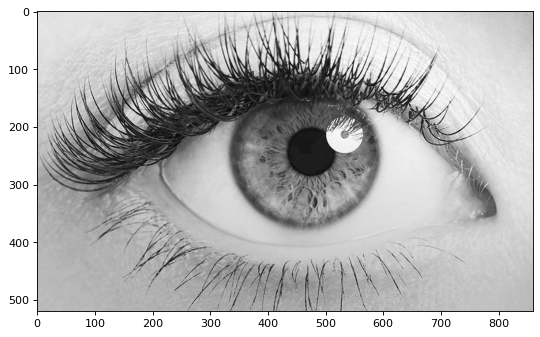

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
img_gray_recon = idft_xs(Xs,fs)
plt.imshow(img_gray_recon, cmap='gray');

Low Pass filtering of the image in frequency domain

In [ ]:
def lowpass(img_gray, fc):
  '''
    Inputs:
           img_gray  - grayscaled image of size N x N
           fc        - cutoff frequency 
                  - 0 < fc < sqrt(img.shape[0]*img.shape[1])/2
    
    Outputs:
           out_img - filtered image of size N x N

    Note:  You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2.
           Also, use dft_xs() and idft_xs() in the code.
                  
  '''
  fc = math.floor(fc)
  bsize = [fc, fc]
  box = np.zeros_like(img_gray)
  box[0:bsize[0],0:bsize[1]] = 1

  Xs, fs = dft_xs(img_gray)

  ishift_Xs = np.fft.ifftshift(Xs)
  ishift_fs = np.fft.ifftshift(fs)

  ishift_Xs = ishift_Xs*box
  ishift_fs = ishift_fs*box

  new_Xs = np.fft.fftshift(ishift_Xs)
  new_fs = np.fft.fftshift(ishift_fs)

  img_out_low = idft_xs(new_Xs,new_fs)

  return img_out_low

High Pass filtering of the image in frequency domain

In [ ]:
def highpass(img_gray, fc):
  '''
    Inputs:
           img_gray  - grayscaled image of size N x N
           fc        - cutoff frequency 
                     - 0 < fc < sqrt(img.shape[0]*img.shape[1])/2

    Outputs:
           out_img - filtered image of size N x N

    Note:  You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2.
           Use dft_xs() and idft_xs() in the code.
                  
  '''
  fc = math.floor(fc)
  bsize = [fc, fc]
  box = np.ones_like(img_gray)
  box[0:bsize[0],0:bsize[1]] = 0

  Xs, fs = dft_xs(img_gray)

  ishift_Xs = np.fft.ifftshift(Xs)
  ishift_fs = np.fft.ifftshift(fs)

  ishift_Xs = ishift_Xs*box
  ishift_fs = ishift_fs*box

  new_Xs = np.fft.fftshift(ishift_Xs)
  new_fs = np.fft.fftshift(ishift_fs)

  img_out_high = idft_xs(new_Xs,new_fs)
  
  return img_out_high

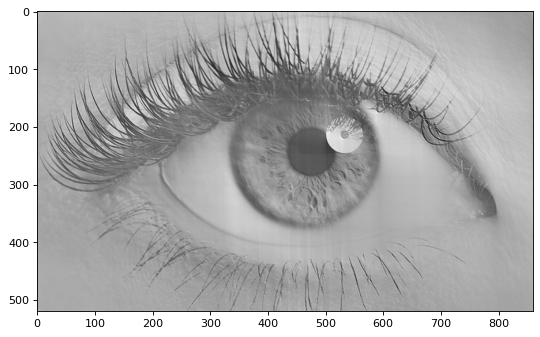

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
img_out_high = highpass(img_gray, fc)
plt.imshow(img_out_high, cmap='gray');

Band Reject filtering of the image in frequency domain

In [ ]:
def bandreject(img_gray, fL, fH):
  '''
    Inputs:
           img_gray  - grayscaled image of size N x N
           fL & fH   - cutoff frequency 
                     - 0 < fL < fH < sqrt(img.shape[0]*img.shape[1])/2

    Outputs:
           out_img - filtered image of size N x N

    Note:  You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2.
           Use dft_xs() and idft_xs() in the code.
                  
  '''
  fL = math.floor(fL)
  fH = math.floor(fH)

  bsize1 = [fH, fH]
  box1 = np.zeros_like(img_gray)
  box1[0:bsize1[0],0:bsize1[1]] = 1

  bsize2 = [fL, fL]
  box2 = np.ones_like(img_gray)
  box2[0:bsize2[0],0:bsize2[1]] = 0

  box = box1*box2
  box = np.logical_not(box).astype(int)

  Xs, fs = dft_xs(img_gray)

  ishift_Xs = np.fft.ifftshift(Xs)
  ishift_fs = np.fft.ifftshift(fs)

  ishift_Xs = ishift_Xs*box
  ishift_fs = ishift_fs*box

  new_Xs = np.fft.fftshift(ishift_Xs)
  new_fs = np.fft.fftshift(ishift_fs)

  img_out_bandrej = idft_xs(new_Xs,new_fs)
  return img_out_bandrej

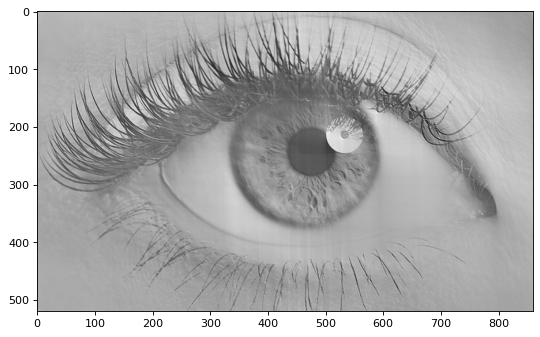

In [ ]:
fL = 50
fH = 200
plt.figure(num=None, figsize=(8, 6), dpi=80)
img_out_bandrej = bandreject(img_gray, fL, fH)
plt.imshow(img_out_high, cmap='gray');

In [ ]:
# Do not change codes inside this cell

img2 = cv2.imread('pic2.jpg', 0)
img2 = rgb2gray(img2)

def plot_frame(gridx, gridy, subplot_id, img, name, axis=False):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray", vmin=0, vmax=255)
    
    if axis == False:
        plt.axis("off")
    plt.title(name)

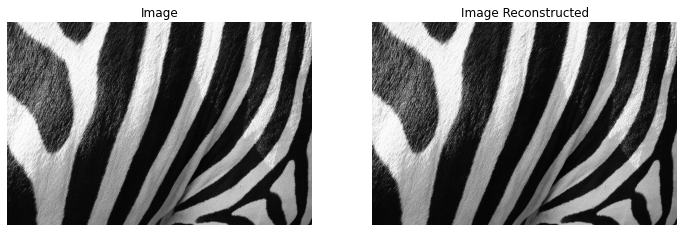

In [ ]:
# Test dft_xs() and idft_xs()
# Make sure the reconstructed image looks similar to the original image

mag_spectrum, phase_spectrum = dft_xs(img2)
noisy_img_recon = idft_xs(mag_spectrum, phase_spectrum)

plt.figure(figsize=(12, 6))
plot_frame(1, 2, 0, img2, "Image")
plot_frame(1, 2, 1, noisy_img_recon, "Image Reconstructed")

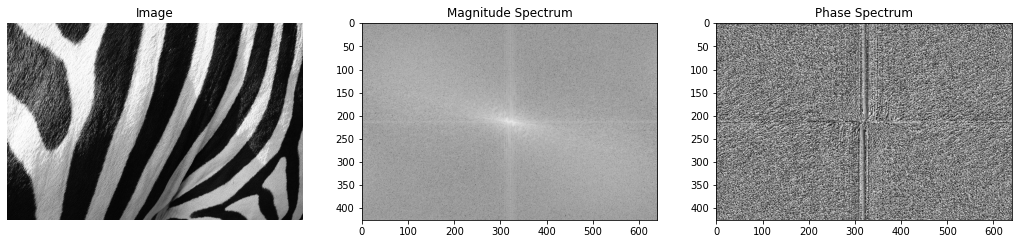

In [ ]:
# Do not change codes inside this cell

mag_spectrum, phase_spectrum = dft_xs(img2)

plt.figure(figsize=(18, 6))
plot_frame(1, 3, 0, img2, "Image")

tmp = np.log(mag_spectrum)
tmp -= np.min(tmp)
if np.max(tmp) != 0:
    tmp /= np.max(tmp)
tmp *= 255
plot_frame(1, 3, 1, tmp, "Magnitude Spectrum", axis=True)

tmp = phase_spectrum
tmp -= np.min(tmp)
if np.max(tmp) != 0:
    tmp /= np.max(tmp)
tmp *= 255
plot_frame(1, 3, 2, phase_spectrum, "Phase Spectrum", axis=True)

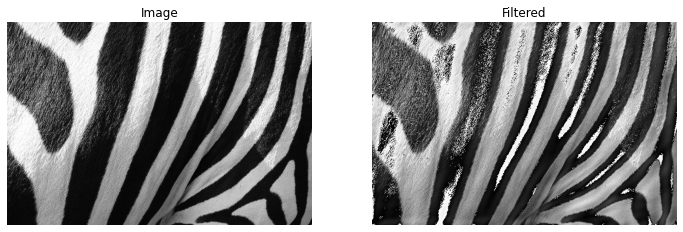

In [ ]:
# Have a look at the phase and magnitude spectrum of the image and find a suitable fL and fH for
# a Band reject filter to work subjectively sufficiently

def plot_bandreject_output(fL, fH):
    if fL == ".....":
        fL = 1
        fH = int(img2.shape[0]/2)
        
    img2_filtered = bandreject(img2, fL, fH)
    plt.figure(figsize=(12, 6))
    plot_frame(1, 2, 0, img2, "Image")
    plot_frame(1, 2, 1, img2_filtered, "Filtered")


#############################
# Your part #################
#############################

# Replace with your value for fL and fH
#fL = "....."
#fH = "....."

fL = 10
fH = 25

plot_bandreject_output(fL, fH)

In [ ]:
# Have a look at the phase and magnitude spectrum of the image and find a suitable fc for Low Pass and High Pass filters 
# so that the filter:
# 1. covers 25% of the area in magnitude spectrum, call it fc_quart
# 2. covers 50% of the area in magnitude spectrum, call it fc_half



#############################
# Write code here to find out 25% and 50% fc #
fc_quart = np.sqrt(img2.shape[0] * img2.shape[1]) / 2
fc_half = np.sqrt(img2.shape[0] * img2.shape[1]) / np.sqrt(2)
#############################



### Observations

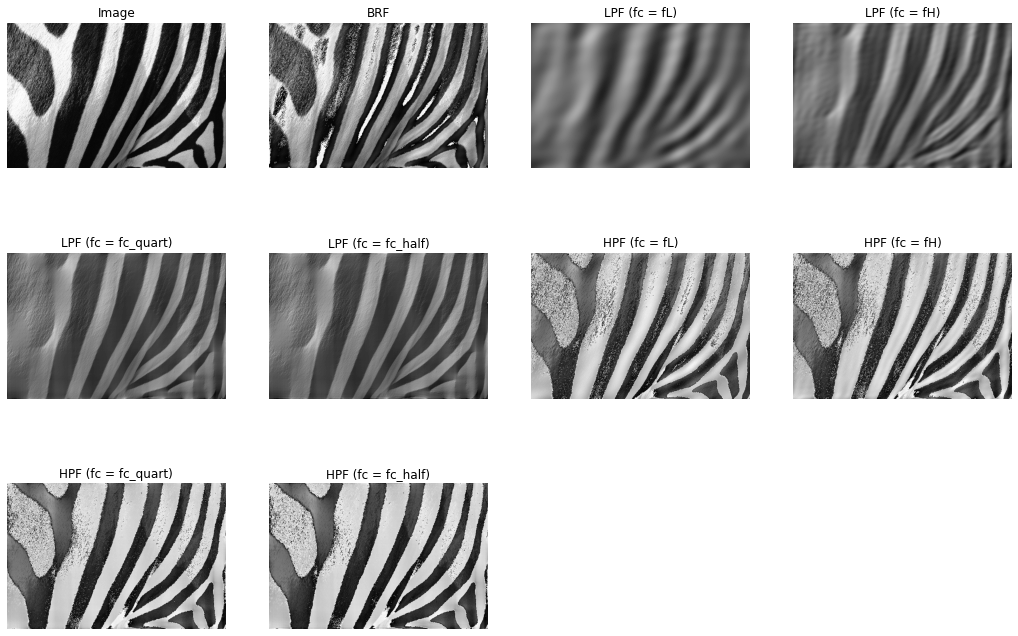

In [ ]:
# Do not change codes inside this cell
# Add your observations in next cell

plt.figure(figsize=(18, 12))
plot_frame(3, 4, 0, img2, "Image")

tmp = bandreject(img2, fL, fH)
plot_frame(3, 4, 1, tmp, "BRF")

tmp = lowpass(img2, fL)
plot_frame(3, 4, 2, tmp, "LPF (fc = fL)")

tmp = lowpass(img2, fH)
plot_frame(3, 4, 3, tmp, "LPF (fc = fH)")

tmp = lowpass(img2, fc_quart)
plot_frame(3, 4, 4, tmp, "LPF (fc = fc_quart)")

tmp = lowpass(img2, fc_half)
plot_frame(3, 4, 5, tmp, "LPF (fc = fc_half)")

tmp = highpass(img2, fL)
plot_frame(3, 4, 6, tmp, "HPF (fc = fL)")

tmp = highpass(img2, fH)
plot_frame(3, 4, 7, tmp, "HPF (fc = fH)")

tmp = highpass(img2, fc_quart)
plot_frame(3, 4, 8, tmp, "HPF (fc = fc_quart)")

tmp = highpass(img2, fc_half)
plot_frame(3, 4, 9, tmp, "HPF (fc = fc_half)")

In [ ]:
# Add your observations; make sure you compare all the five filtering operations done in the previous cell

your_observation = """
1. Although Zebra stripes are slanted in the image, black and white variations are mainly happenning in the x direction.
This is the reason why white beam appearing radially outward in Magnitude plot is alligned more along x-axis.

2. It was important to chop off the frequencies (both in LPF and HPF) before shifting the origin of Mag plot and Phase plot to centre.

3. LPF has smoothened out edges (of black and white boundaries)as it rejected the high frequency components in the image.

4. HPF has enhanced the edges (of black and white boundaries) as it rejected the low frequency components in the image. 
Even the minute hair details got enhanced. They too are high freq. component.

5. In BRF, certain medium frequency component like different shades of black or shades of white (places where zebra skin got folded)
 were highlighted.
"""

print(your_observation)


1. Although Zebra stripes are slanted in the image, black and white variations are mainly happenning in the x direction.
This is the reason why white beam appearing radially outward in Magnitude plot is alligned more along x-axis.

2. It was important to chop off the frequencies (both in LPF and HPF) before shifting the origin of Mag plot and Phase plot to centre.

3. LPF has smoothened out edges (of black and white boundaries)as it rejected the high frequency components in the image.

4. HPF has enhanced the edges (of black and white boundaries) as it rejected the low frequency components in the image. 
Even the minute hair details got enhanced. They too are high freq. component.

5. In BRF, certain medium frequency component like different shades of black or shades of white (places where zebra skin got folded)
 were highlighted.

